### _Imports_

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

import textwrap

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Superstore_250218.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98,110.02,0.16,386,FUR-BO-10001798-00386,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98,170.79,0.30,839,FUR-CH-10000454-00839,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31,3.87,0.47,1433,OFF-LA-10000240-01433,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23,366,FUR-TA-10000577-00366,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18,9.93,0.29,573,OFF-ST-10000760-00573,2015,10


In [3]:
#df.info()

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Order Year,Order Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,75.571127,60.918954,53.119865,0.341016,922.324795,2015.722233,7.809686
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,188.961461,142.927479,122.251161,0.135602,531.515975,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.990000,0.340000,0.540000,0.000000,0.000000,2014.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,6.480000,5.470000,3.470000,0.260000,474.250000,2015.000000,5.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,19.980000,16.270000,12.930000,0.340000,907.000000,2016.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,76.980000,63.940000,54.520000,0.470000,1390.000000,2017.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,7546.160000,3773.080000,4074.930000,0.500000,1849.000000,2017.000000,12.000000


### Profit analysis

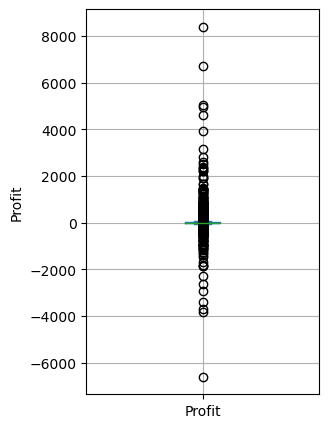

In [5]:
# Boxplot

data = df['Profit']

ax = data.plot.box(figsize=(3, 5))
ax.set_ylabel('Profit')
plt.grid()

In [6]:
# Range

rng = df['Profit'].max() - df['Profit'].min()
print(f'Profit Range is: {rng}')

Profit Range is: 14999.954000000002


In [7]:
# Distribution

per_05 = df['Profit'].quantile(0.05)
per_95 = df['Profit'].quantile(0.95)

print(f'90% of Profit distribution is between {int(per_05)} and {int(per_95)} dollars')

90% of Profit distribution is between -53 and 168 dollars


Text(0.5, 0, 'Profit')

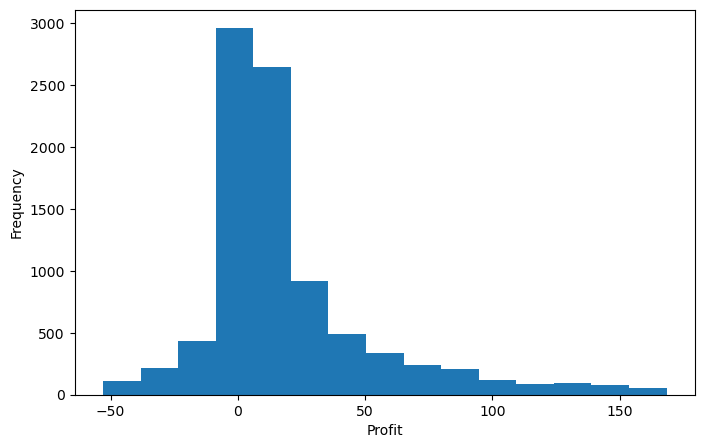

In [8]:
# Histogram

data = df['Profit']
ax = data.plot.hist(bins=15, range=(per_05, per_95), figsize=(8, 5))
ax.set_xlabel('Profit')

**INSIGHT**: profit has high variability. The mean is 28,66 dollars, but the range is 15.000 dollars. 80% of Profit is distributed between -53 and 168 dollars.

We need to understand the reasons of negative profit and how this can be improved. Let's see how this evolved year to year.

In [9]:
# Creating two sub-sets

profit_neg = df[df['Profit'] < 0 ]
profit_pos = df[df['Profit'] >= 0 ]

# Grouping by year

profit_neg = profit_neg.groupby('Order Year').agg(
    profit_neg_sum=('Profit', 'sum'),
    quantity_neg_sum=('Quantity', 'sum'))
    
profit_pos = profit_pos.groupby('Order Year').agg(
    profit_pos_sum=('Profit', 'sum'),
    quantity_pos_sum=('Quantity', 'sum'))


# Calculating the share of pieces sold with negative profit

result = pd.merge(profit_neg, profit_pos, on='Order Year')
result['neg_profit_share'] = (result['quantity_neg_sum'] / (result['quantity_neg_sum'] + result['quantity_pos_sum'])) * 100

result

,profit_neg_sum,quantity_neg_sum,profit_pos_sum,quantity_pos_sum,neg_profit_share
Order Year,,,,,
2014,-31892.7717,1409,81436.7458,6172,18.585939
2015,-32529.3909,1539,94147.9946,6440,19.288131
2016,-37872.9297,1801,119668.1040,8036,18.308427
2017,-53836.1934,2291,147275.4630,10185,18.363257


Conclusion: it seems that the share of pieces sold with negative profit is nearly stable: 18%.

### Profit vs Numerical Variables

In [10]:
num_vars = list(df.describe().columns)
cat_vars = [col for col in df.columns if col not in num_vars]

In [11]:
df_num_vars = df[num_vars]

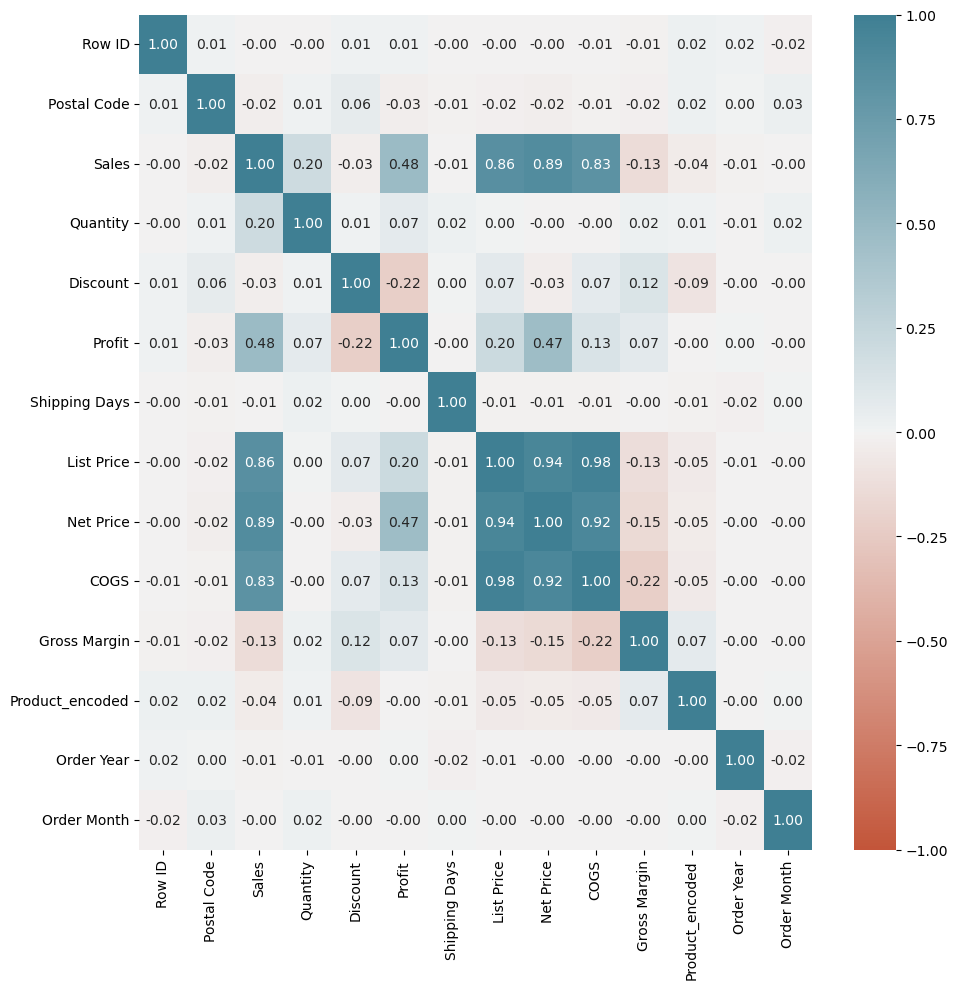

In [12]:
# Correlation Matix:

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_num_vars.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True,
                 fmt=".2f",
                 ax=ax)
plt.tight_layout()

**INSIGHTS**:
- The variables that are most related to Profit are List Price, Net Price and Sales (positive impact), and Discounts (negative impact)
- Surprisingly the Quantity has low correlation with Profit. This might be explained by the fact that Quantity and Price have no correlation. Translating this into business logic, it means that no matter how expensive the product is, the customer will always buy the same number of pieces. This usually applies to need-driven purchases or might be also a consequence of market conditions (number of market players).
- The Quantity is neither explained by the discounts, meaning that discounts are not boosting sales. By contrary, discounts decrease the profit. This is meaningful for discount strategy of the supermarket

C:\Users\Kristina\AppData\Local\Temp\ipykernel_7832\1010233530.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, y='Profit', x='Sales', palette='viridis', size='Discount',


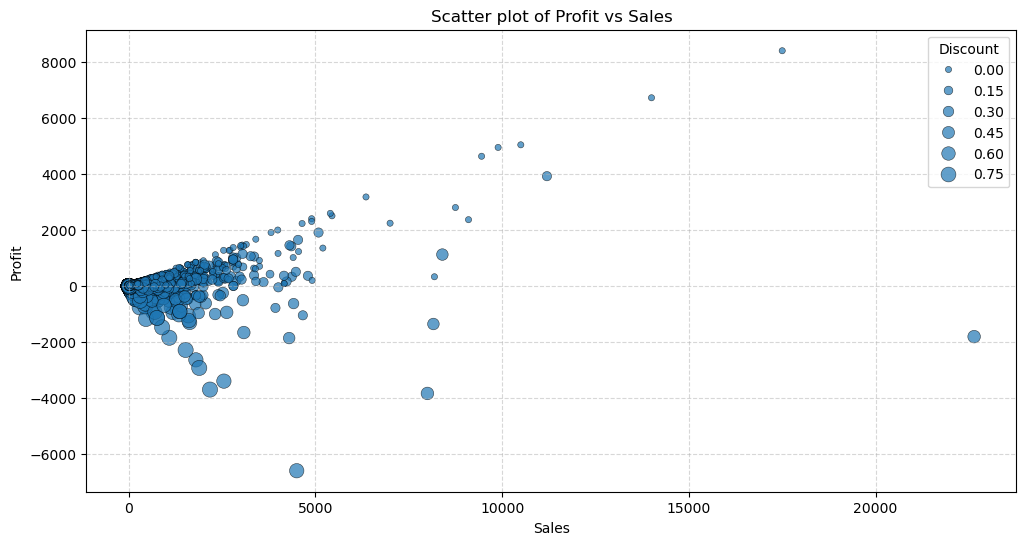

In [13]:
# Scatter plot - Profit vs Sales:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='Profit', x='Sales', palette='viridis', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.grid(True, linestyle='--', alpha=0.5) 

Conclusion: this confirms what we have seen in correlation matrix. Profit is positively related to Sales, but most sales with high discount have negative profit.

C:\Users\Kristina\AppData\Local\Temp\ipykernel_7832\3849271103.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, y='Profit', x='Discount', palette='viridis', size='Sales',


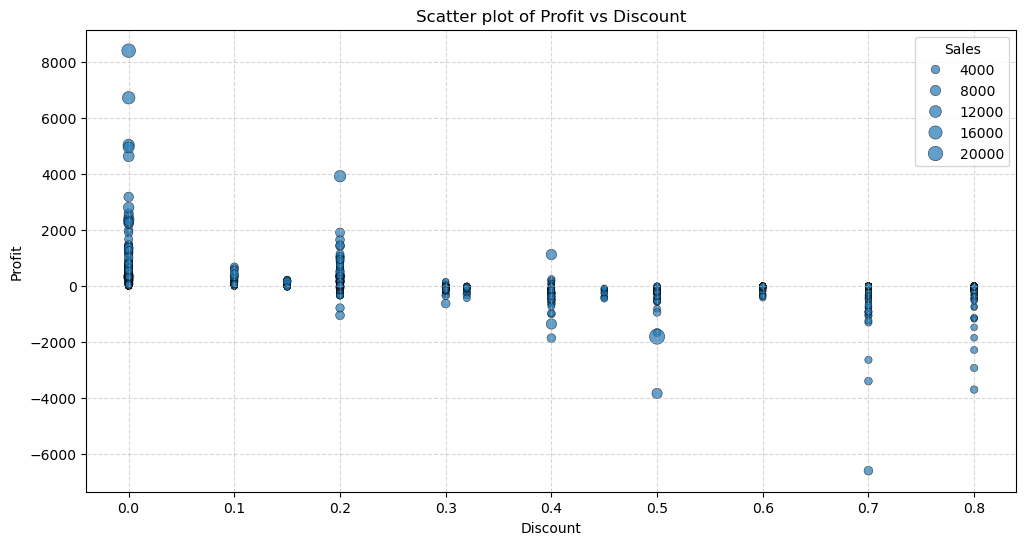

In [14]:
# Scatter plot - Profit vs Discount:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='Profit', x='Discount', palette='viridis', size='Sales',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.grid(True, linestyle='--', alpha=0.5) 

**INSIGHTS**: Above 40% of discount the profit is always negative. So, unless the discount is motivated by the need of stock cleaning, the company should consider giving a maximum discount of 40% or less.

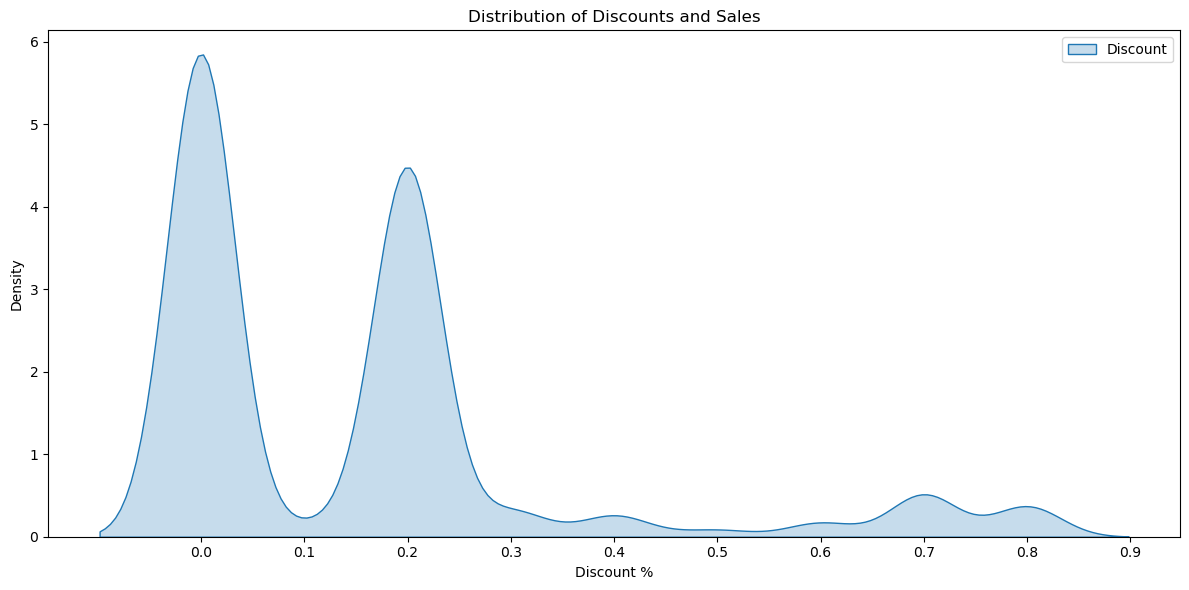

In [15]:
# Plot KDE for Discount

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Conclusion: this ilustrates more precisely that most of the sales are generated with discounts of 0% and 20%.

In [16]:
# Evolution over time:

profit_year = df.groupby('Order Year').agg(
    profit=('Profit', 'sum'),
    list_price=('List Price', 'mean'),
    discount=('Discount', 'mean'),
    sales=('Sales', 'sum'),
    quantity=('Quantity', 'sum'),
    num_products=('Product PK', 'count'),
    num_branches=('Postal Code', 'count'),
    cogs=('COGS', 'mean'),
)

profit_year['gross_margin'] = profit_year['profit'] / profit_year['sales']

profit_year

,profit,list_price,discount,sales,quantity,num_products,num_branches,cogs,gross_margin
Order Year,,,,,,,,,
2014,49543.9741,79.093618,0.158284,484247.4981,7581,1993,1993,55.335931,0.102311
2015,61618.6037,72.932892,0.155609,470532.5090,7979,2102,2102,51.177355,0.130955
2016,81795.1743,76.066104,0.154743,609205.5980,9837,2587,2587,53.803409,0.134265
2017,93439.2696,74.739224,0.156467,733215.2552,12476,3312,3312,52.485266,0.127438


**INSIGHTS**:
- Profit increased year over year
- Average discount is stable (15%)
- Sales increased in the last two years, but not in 2015. That might be because of lower List Price that year compared to the previous.
- Gross Margin increased in 2015 and 2016, but decreased in 2017

### Profit vs Categorical Variables

In [17]:
# Customer Segment

df_segment = df.groupby('Segment').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_segment['profit_sum'] = df_segment['profit_sum']/1000
df_segment['sales_sum'] = df_segment['sales_sum']/1000
df_segment['quantity_sum'] = df_segment['quantity_sum']/1000
df_segment['gross_margin'] = df_segment['profit_sum'] / df_segment['sales_sum']
    
df_segment

,Segment,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,Consumer,134.119209,25.836873,0.158141,1161.401345,19.521,0.115481
1,Corporate,91.979134,30.456667,0.158228,706.146367,11.608,0.130255
2,Home Office,60.298679,33.818664,0.147128,429.653148,6.744,0.140343


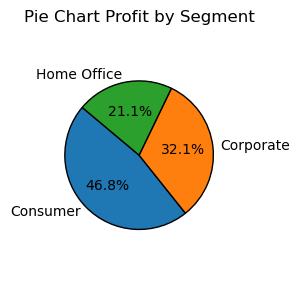

In [18]:
plt.figure(figsize=(3, 3))

plt.pie(df_segment['profit_sum'], labels=df_segment['Segment'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Segment')
plt.tight_layout()

**INSIGHTS:** Consumer segment delivers the biggest share of Profit, but it also has the lowest Gross Margin.

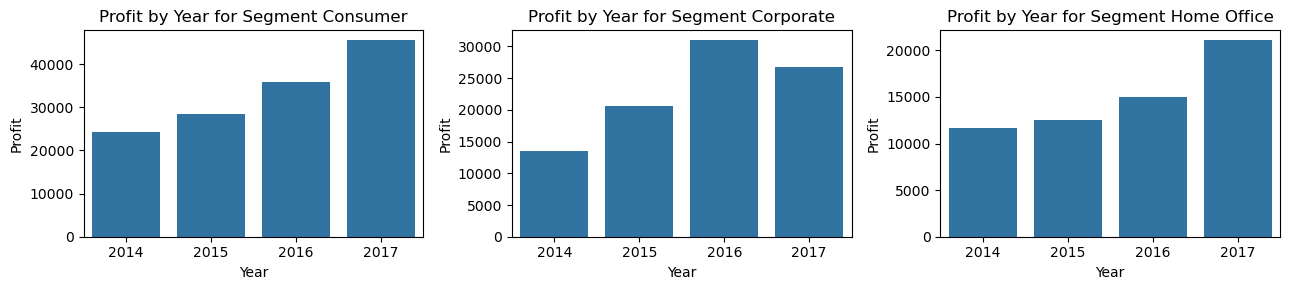

In [19]:
# Segment evolution by year:

eval_feature = 'Profit'

df_segment_year = df.groupby(['Segment', 'Order Year'])[eval_feature].sum().reset_index()

segments = df_segment_year['Segment'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(segments), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, segment in zip(axes, segments):

    segment_data = df_segment_year[df_segment_year['Segment'] == segment]
    
    sns.barplot(data=segment_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Segment {segment}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Profit increased in all segments year over year, except for Corporate, where total profit decreased in 2017.

**To does:** see why?

In [20]:
# Product Category

df_category = df.groupby('Category').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_category['profit_sum'] = df_category['profit_sum']/1000
df_category['sales_sum'] = df_category['sales_sum']/1000
df_category['quantity_sum'] = df_category['quantity_sum']/1000
df_category['gross_margin'] = df_category['profit_sum'] / df_category['sales_sum']
    
df_category

,Category,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,Furniture,18.451273,8.699327,0.173923,741.999795,8.028,0.024867
1,Office Supplies,122.490801,20.327050,0.157285,719.047032,22.906,0.170352
2,Technology,145.454948,78.752002,0.132323,836.154033,6.939,0.173957


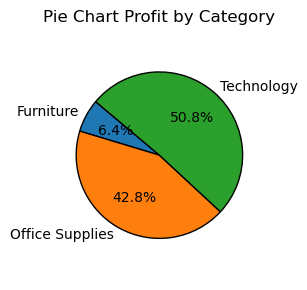

In [21]:
plt.figure(figsize=(3, 3))

plt.pie(df_category['profit_sum'], labels=df_category['Category'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Category')
plt.tight_layout()

**INSIGHTS:**
- The most profitable product category is Technology, represents half of the total Profit
- Furniture has very low Gross Margin (only 2%). This is something to improve

**To does:** analyse why GM for Furniture is so low

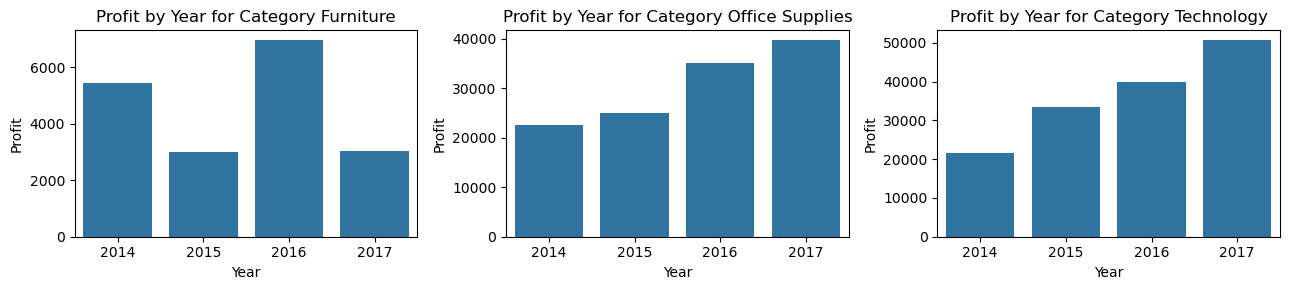

In [22]:
# Category evolution by year:

eval_feature = 'Profit'

df_category_year = df.groupby(['Category', 'Order Year'])[eval_feature].sum().reset_index()

categories = df_category_year['Category'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, category in zip(axes, categories):

    category_data = df_category_year[df_category_year['Category'] == category]
    
    sns.barplot(data=category_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Category {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Office Suppliers and Technology grew year over year, but Furniture decreased significantly in 2015 and 2017. We need to analyse what was different in those years to identify the reason of profit loss.

In [23]:
# Product Sub-Category

df_subcat = df.groupby(['Category', 'Sub-Category']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_subcat['profit_sum'] = df_subcat['profit_sum']/1000
df_subcat['sales_sum'] = df_subcat['sales_sum']/1000
df_subcat['quantity_sum'] = df_subcat['quantity_sum']/1000
df_subcat['gross_margin'] = df_subcat['profit_sum'] / df_subcat['sales_sum']
    
df_subcat.sort_values(by='profit_sum')

,Category,Sub-Category,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
3,Furniture,Tables,-17.725481,-55.565771,0.261285,206.965532,1.241,-0.085645
0,Furniture,Bookcases,-3.472556,-15.230509,0.211140,114.879996,0.868,-0.030228
12,Office Supplies,Supplies,-1.189099,-6.258418,0.076842,46.673538,0.647,-0.025477
8,Office Supplies,Fasteners,0.949518,4.375660,0.082028,3.024280,0.914,0.313965
15,Technology,Machines,3.384757,29.432669,0.306087,189.238631,0.440,0.017886
9,Office Supplies,Labels,5.546254,15.236962,0.068681,12.486312,1.400,0.444187
5,Office Supplies,Art,6.527787,8.200737,0.074874,27.118792,3.000,0.240711
7,Office Supplies,Envelopes,6.964177,27.418019,0.080315,16.476402,0.906,0.422676
2,Furniture,Furnishings,13.059144,13.645918,0.138349,91.705164,3.563,0.142404
4,Office Supplies,Appliances,18.138005,38.922758,0.166524,107.532161,1.729,0.168675


**INSIGHTS**:
- Tables, Bookcases and Suppliers have negative profit.
- Machines, Storage and Chairs have Gross Margin <10%
- Tables, Bookcases, Machines and Binders have discount >20%

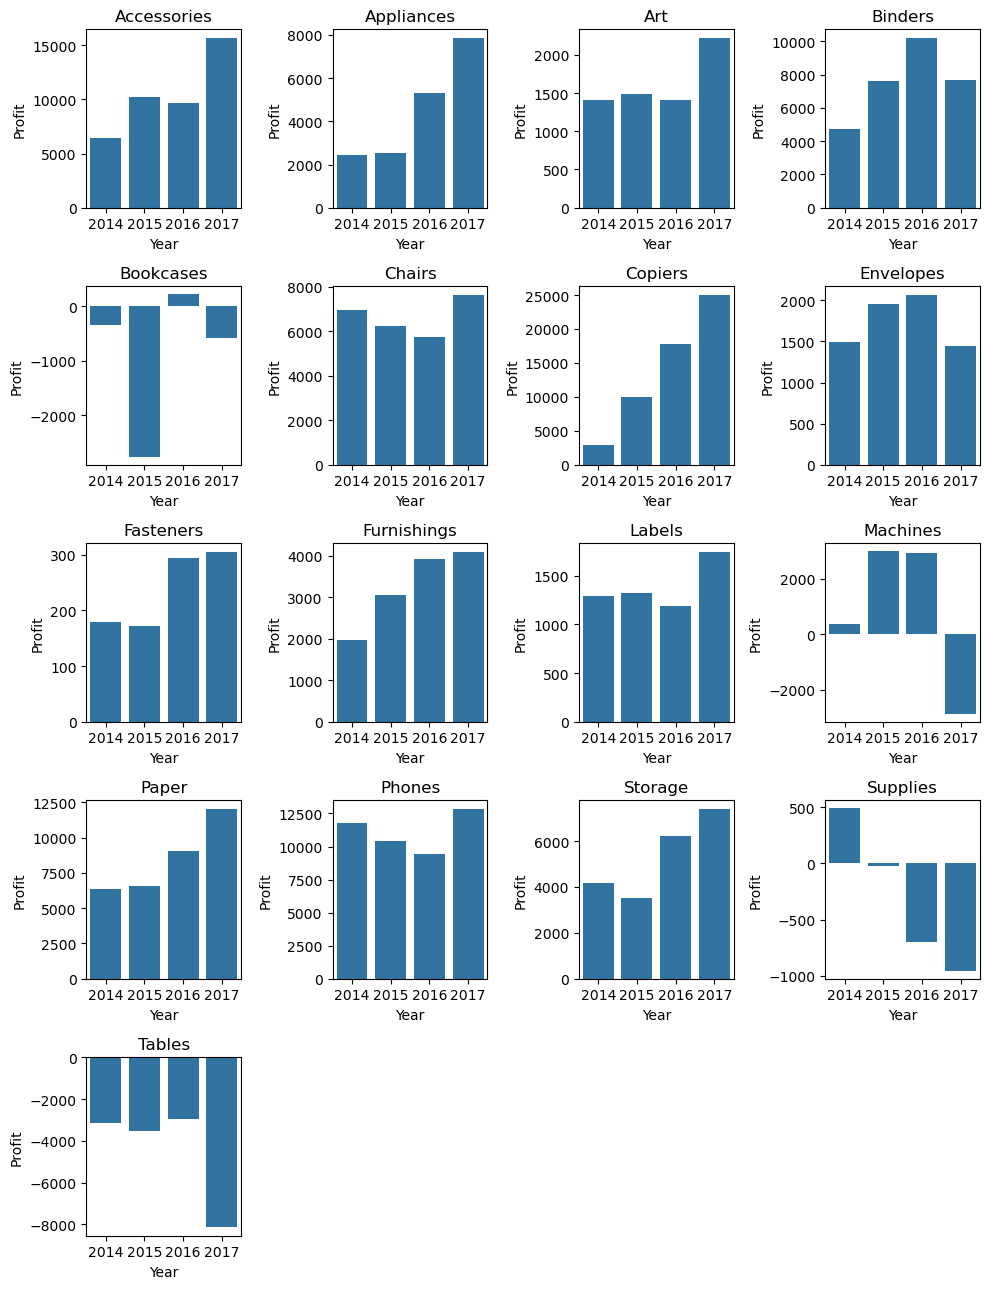

In [24]:
# Sub-Category evolution by year:

eval_feature = 'Profit'

df_subcat_year = df.groupby(['Sub-Category', 'Order Year'])[eval_feature].sum().reset_index()

subcats = df_subcat_year['Sub-Category'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 13))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, subcat) in enumerate(zip(axes, subcats)):

    subcat_data = df_subcat_year[df_subcat_year['Sub-Category'] == subcat]
    
    sns.barplot(data=subcat_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(subcat)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

Conclusion: 
- Tables always had negative profit, this might be due to a wrong price policy
- Bookcases only had positive profit in 2016 and then turned again negative
- Suppliers had positive profit in 2014 but the following years it turned negative
- Machines and Biners had negative profit only in 2017, this needs to be investigated

In [25]:
# Products

df_prod = df.groupby(['Category', 'Sub-Category', 'Product PK', 'Product Name']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_prod['profit_sum'] = df_prod['profit_sum']/1000
df_prod['sales_sum'] = df_prod['sales_sum']/1000
df_prod['quantity_sum'] = df_prod['quantity_sum']/1000
df_prod['gross_margin'] = df_prod['profit_sum'] / df_prod['sales_sum']

df_prod = df_prod.sort_values(by='profit_sum', ascending = False)

In [26]:
# Top10 Products:

df_prod.head(10)

,Category,Sub-Category,Product PK,Product Name,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
1640,Technology,Copiers,TEC-CO-10004722-00404,Canon imageCLASS 2200 Advanced Copier,25.199928,5039.985600,0.120000,61.599824,0.020,0.409091
787,Office Supplies,Binders,OFF-BI-10003527-00650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7.753039,775.303900,0.240000,27.453384,0.031,0.282407
1630,Technology,Copiers,TEC-CO-10001449-00805,Hewlett Packard LaserJet 3310 Copier,6.983884,872.985450,0.200000,18.839686,0.038,0.370701
1637,Technology,Copiers,TEC-CO-10003763-00400,Canon PC1060 Personal Laser Copier,4.570935,1142.733675,0.150000,11.619834,0.019,0.393373
1657,Technology,Machines,TEC-MA-10001127-00787,HP Designjet T520 Inkjet Large Format Printer ...,4.094977,1364.992200,0.166667,18.374895,0.012,0.222857
1693,Technology,Machines,TEC-MA-10003979-00165,Ativa V4110MDD Micro-Cut Shredder,3.772946,1886.473050,0.000000,7.699890,0.011,0.490000
1656,Technology,Machines,TEC-MA-10001047-00019,"3D Systems Cube Printer, 2nd Generation, Magenta",3.717971,1858.985700,0.000000,14.299890,0.011,0.260000
1541,Technology,Accessories,TEC-AC-10002049-01276,Plantronics Savi W720 Multi-Device Wireless He...,3.696282,528.040286,0.057143,9.367290,0.024,0.394595
692,Office Supplies,Binders,OFF-BI-10001120-00895,Ibico EPK-21 Electric Binding System,3.345282,1115.094100,0.333333,15.875916,0.013,0.210714
1643,Technology,Machines,TEC-MA-10000045-01840,Zebra ZM400 Thermal Label Printer,3.343536,1671.768000,0.000000,6.965700,0.006,0.480000


In [27]:
top_prod_lst = list(df_prod.head(10)['Product PK'])
top_prod_lst

['TEC-CO-10004722-00404',
 'OFF-BI-10003527-00650',
 'TEC-CO-10001449-00805',
 'TEC-CO-10003763-00400',
 'TEC-MA-10001127-00787',
 'TEC-MA-10003979-00165',
 'TEC-MA-10001047-00019',
 'TEC-AC-10002049-01276',
 'OFF-BI-10001120-00895',
 'TEC-MA-10000045-01840']

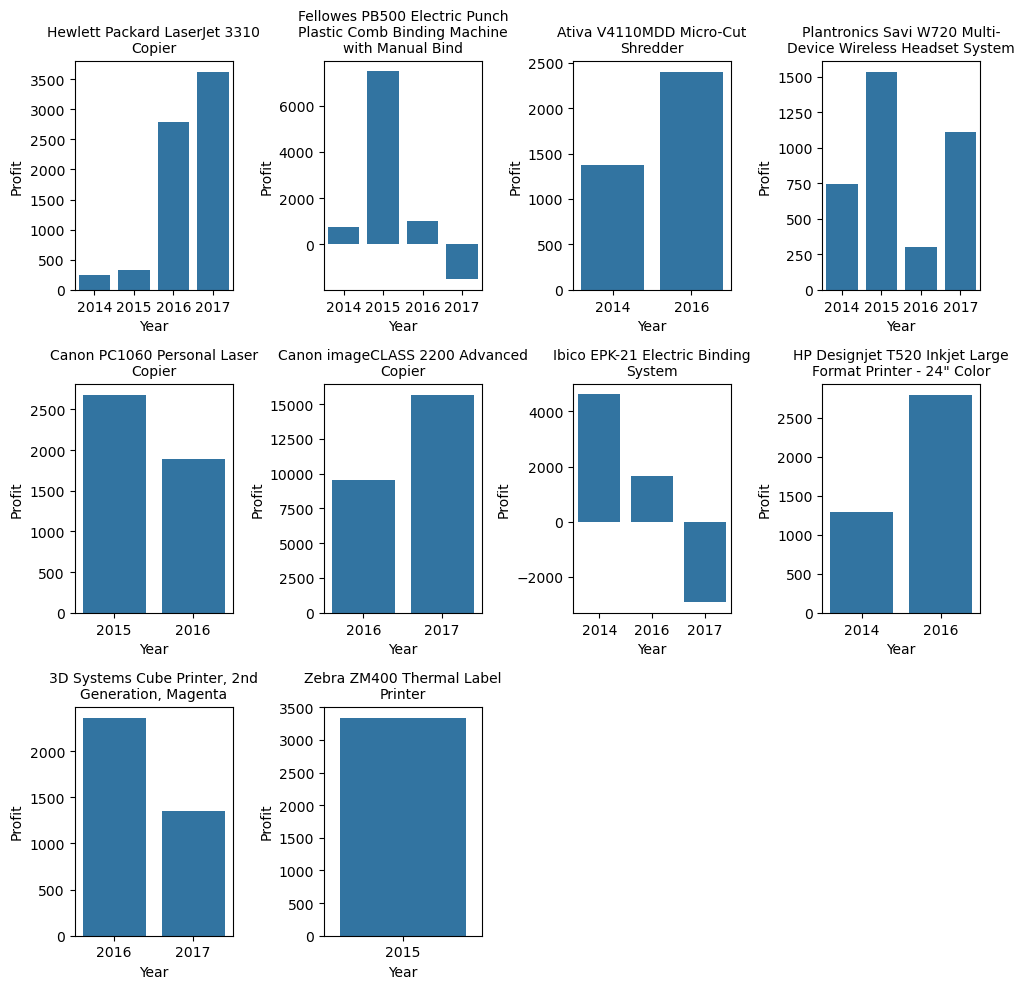

In [28]:
# Top10 products evolution by year:

eval_feature = 'Profit'

df_top_prod = df[df['Product PK'].isin(top_prod_lst)]

top_prods = df_top_prod['Product Name'].unique()

df_top_prod_year = df_top_prod.groupby(['Product Name', 'Order Year'])[eval_feature].sum().reset_index()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, top_prod) in enumerate(zip(axes, top_prods)):

    top_prod_data = df_top_prod_year[df_top_prod_year['Product Name'] == top_prod]
    
    sns.barplot(data=top_prod_data, x='Order Year', y=eval_feature, ax=ax)
    
    wrapped_title = textwrap.fill(top_prod, width=30)
    
    ax.set_title(wrapped_title, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

Conclusion: some products turned to negative Profit in the last year. We need to check Profit by Product by Year

In [29]:
# Bottom10 Products:

df_prod.tail(10)

,Category,Sub-Category,Product PK,Product Name,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
375,Furniture,Tables,FUR-TA-10004289-00364,BoxOffice By Design Rectangular and Half-Moon ...,-1.148438,-382.812500,0.483333,1.706250,0.015,-0.673077
346,Furniture,Tables,FUR-TA-10001950-00285,Balt Solid Wood Round Tables,-1.201058,-300.264525,0.200000,6.518754,0.019,-0.184247
1465,Office Supplies,Supplies,OFF-SU-10002881-01043,Martin Yale Chadless Opener Electric Letter Op...,-1.299184,-216.530600,0.100000,16.656200,0.022,-0.078000
1669,Technology,Machines,TEC-MA-10002412-00444,Cisco TelePresence System EX90 Videoconferenci...,-1.811078,-1811.078400,0.500000,22.638480,0.006,-0.080000
858,Office Supplies,Binders,OFF-BI-10004995-00683,GBC DocuBind P400 Electric Binding System,-1.878166,-313.027700,0.450000,17.965068,0.027,-0.104545
344,Furniture,Tables,FUR-TA-10001889-00376,Bush Advantage Collection Racetrack Conference...,-1.934398,-276.342514,0.350000,9.544725,0.033,-0.202667
326,Furniture,Tables,FUR-TA-10000198-00425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2.876116,-575.223120,0.280000,9.917640,0.027,-0.290000
1696,Technology,Machines,TEC-MA-10004125-00476,Cubify CubeX 3D Printer Triple Head Print,-3.839990,-3839.990400,0.500000,7.999980,0.004,-0.480000
1650,Technology,Machines,TEC-MA-10000822-00985,Lexmark MX611dhe Monochrome Laser Printer,-4.589973,-1147.493250,0.400000,16.829901,0.018,-0.272727
1645,Technology,Machines,TEC-MA-10000418-00475,Cubify CubeX 3D Printer Double Head Print,-8.879970,-2959.990133,0.533333,11.099963,0.009,-0.800000


In [30]:
bottom_prod_lst = list(df_prod.tail(10)['Product PK'])
bottom_prod_lst

['FUR-TA-10004289-00364',
 'FUR-TA-10001950-00285',
 'OFF-SU-10002881-01043',
 'TEC-MA-10002412-00444',
 'OFF-BI-10004995-00683',
 'FUR-TA-10001889-00376',
 'FUR-TA-10000198-00425',
 'TEC-MA-10004125-00476',
 'TEC-MA-10000822-00985',
 'TEC-MA-10000418-00475']

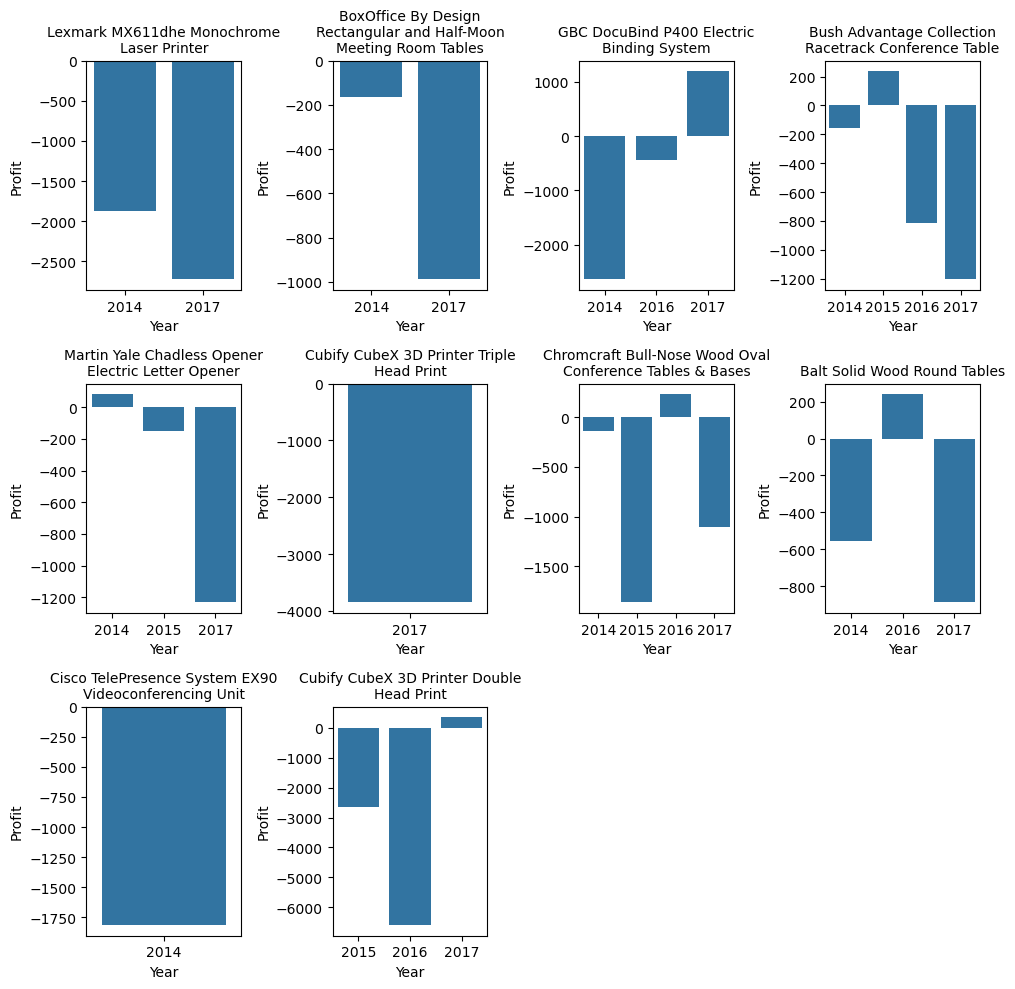

In [31]:
# Bottom10 products evolution by year:

eval_feature = 'Profit'

df_bottom_prod = df[df['Product PK'].isin(bottom_prod_lst)]

bottom_prods = df_bottom_prod['Product Name'].unique()

df_bottom_prod_year = df_bottom_prod.groupby(['Product Name', 'Order Year'])[eval_feature].sum().reset_index()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, bottom_prod) in enumerate(zip(axes, bottom_prods)):

    bottom_prod_data = df_bottom_prod_year[df_bottom_prod_year['Product Name'] == bottom_prod]
    
    sns.barplot(data=bottom_prod_data, x='Order Year', y=eval_feature, ax=ax)
    
    wrapped_title = textwrap.fill(bottom_prod, width=30)
    
    ax.set_title(wrapped_title, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

Conclusion: all bottom products had negative profit at least two years in a row.

In [32]:
# Customers

df_customer = df.groupby(['Segment', 'Customer Name', 'Order Year']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_customer['profit_sum'] = df_customer['profit_sum']/1000
df_customer['sales_sum'] = df_customer['sales_sum']/1000
df_customer['quantity_sum'] = df_customer['quantity_sum']/1000
df_customer['gross_margin'] = df_customer['profit_sum'] / df_customer['sales_sum']

df_customer = df_customer.sort_values(by='profit_sum', ascending = False)

df_customer

,Segment,Customer Name,Order Year,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
1990,Corporate,Tamara Chand,2016,8.764948,1460.824717,0.033333,18.344052,0.020,0.477809
1008,Consumer,Raymond Buch,2017,6.780896,1130.149383,0.066667,14.203278,0.027,0.477418
1095,Consumer,Sanjit Chand,2014,5.462583,496.598455,0.072727,12.876480,0.035,0.424230
514,Consumer,Hunter Lopez,2017,5.045856,2522.928200,0.000000,10.522550,0.005,0.479528
8,Consumer,Adrian Barton,2016,4.747822,1582.607400,0.166667,10.403865,0.018,0.456352
...,...,...,...,...,...,...,...,...,...
1648,Corporate,Henry Goldwyn,2017,-2.971383,-742.845675,0.300000,2.184762,0.015,-1.360049
2435,Home Office,Sharelle Roach,2017,-3.391408,-423.926025,0.412500,3.020541,0.031,-1.122782
784,Consumer,Luke Foster,2014,-3.802081,-475.260075,0.600000,2.690260,0.036,-1.413276
1619,Corporate,Grant Thornton,2017,-3.825339,-1912.669700,0.350000,8.167420,0.006,-0.468366


In [33]:
df_customer_17 = df_customer[(df_customer['Order Year'] == 2017) & (df_customer['profit_sum'] < 0)]

df_customer_17

,Segment,Customer Name,Order Year,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
2019,Corporate,Tracy Poddar,2017,-0.000039,-0.019250,0.200000,0.337688,0.016,-0.000114
1542,Corporate,Dorris liebe,2017,-0.000321,-0.160600,0.500000,0.016696,0.005,-0.019238
1065,Consumer,Roy Französisch,2017,-0.000358,-0.179150,0.350000,0.049620,0.008,-0.007221
599,Consumer,Jill Matthias,2017,-0.000605,-0.604800,0.200000,0.003024,0.003,-0.200000
1883,Corporate,Pamela Coakley,2017,-0.000990,-0.990000,0.700000,0.001188,0.002,-0.833333
...,...,...,...,...,...,...,...,...,...
1500,Corporate,David Bremer,2017,-1.136718,-568.359000,0.400000,0.771540,0.007,-1.473311
923,Consumer,Nathan Cano,2017,-2.330270,-776.756600,0.433333,1.729286,0.014,-1.347533
1648,Corporate,Henry Goldwyn,2017,-2.971383,-742.845675,0.300000,2.184762,0.015,-1.360049
2435,Home Office,Sharelle Roach,2017,-3.391408,-423.926025,0.412500,3.020541,0.031,-1.122782


**INSIGHTS:** In 2017 there are 146 customers that generated negative profit. A common pattern seems to be that they buy with higher discount.

In [34]:
# Region

df_region = df.groupby('Region').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_region['profit_sum'] = df_region['profit_sum']/1000
df_region['sales_sum'] = df_region['sales_sum']/1000
df_region['quantity_sum'] = df_region['quantity_sum']/1000
df_region['gross_margin'] = df_region['profit_sum'] / df_region['sales_sum']
    
df_region

,Region,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,Central,39.706363,17.092709,0.240353,501.239891,8.780,0.079216
1,East,91.522780,32.135808,0.145365,678.781240,10.618,0.134834
2,South,46.749430,28.857673,0.147253,391.721905,6.209,0.119343
3,West,108.418449,33.849032,0.109335,725.457825,12.266,0.149448


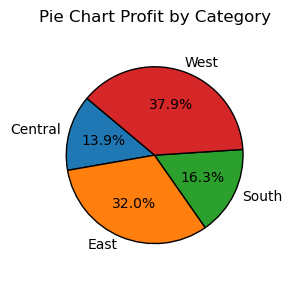

In [35]:
plt.figure(figsize=(3, 3))

plt.pie(df_region['profit_sum'], labels=df_region['Region'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Category')
plt.tight_layout()

**INSIGHTS:**
- West and East are the reginos with the highest profit in value and margin.
- Central region has the lowest Gross Margin

In [36]:
# State

df_state = df.groupby(['Region', 'State']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_state['profit_sum'] = df_state['profit_sum']/1000
df_state['sales_sum'] = df_state['sales_sum']/1000
df_state['quantity_sum'] = df_state['quantity_sum']/1000
df_state['gross_margin'] = df_state['profit_sum'] / df_state['sales_sum']
    
df_state = df_state.sort_values(by='profit_sum', ascending = False)

df_state

,Region,State,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
39,West,California,76.381387,38.171608,0.072764,457.687632,7.667,0.166885
21,East,New York,74.038549,65.637011,0.055319,310.876271,4.224,0.238161
47,West,Washington,33.402652,66.013146,0.064032,138.641270,1.883,0.240929
4,Central,Michigan,24.463188,95.934069,0.007059,76.269614,0.946,0.320746
37,South,Virginia,18.597950,83.026564,0.000000,70.636720,0.893,0.263290
1,Central,Indiana,18.382936,123.375411,0.000000,53.555360,0.578,0.343251
30,South,Georgia,16.250043,88.315453,0.000000,49.095840,0.705,0.330986
31,South,Kentucky,11.199697,80.573357,0.000000,36.591750,0.523,0.306072
5,Central,Minnesota,10.823187,121.608847,0.000000,29.863150,0.331,0.362426
14,East,Delaware,9.977375,103.930988,0.006250,27.451069,0.367,0.363460


**INSIGTS**:
- There are 10 States where the business is not profitable. All of them with high discounts.
- California and New York are clearly the states with the bigguest business share (150 thousand dollars)

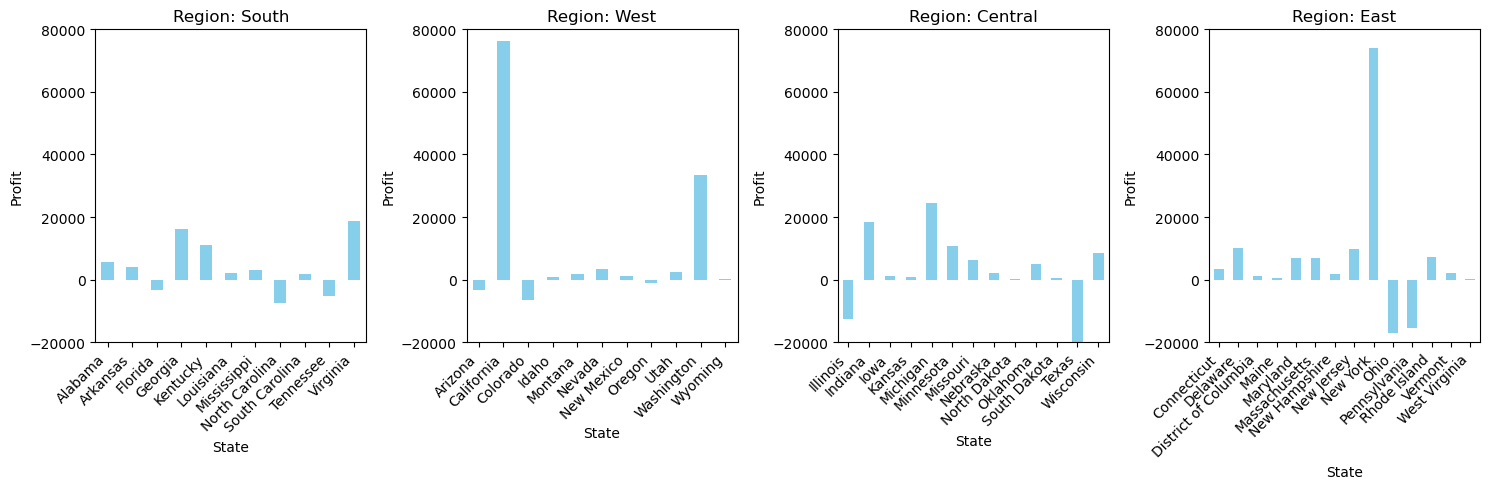

In [37]:
# Profit by state and by region

regions = df['Region'].unique()

plt.figure(figsize=(15, 5))

for i, region in enumerate(regions, start=1):
    plt.subplot(1, 4, i)
    
    region_data = df[df['Region'] == region]
    
    profit_by_state = region_data.groupby('State')['Profit'].sum()
    
    profit_by_state.plot(kind='bar', color='skyblue')
    
    plt.title(f'Region: {region}')
    plt.xlabel('State')
    plt.ylabel('Profit')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(top=80000, bottom=-20000)

plt.tight_layout()
plt.show()

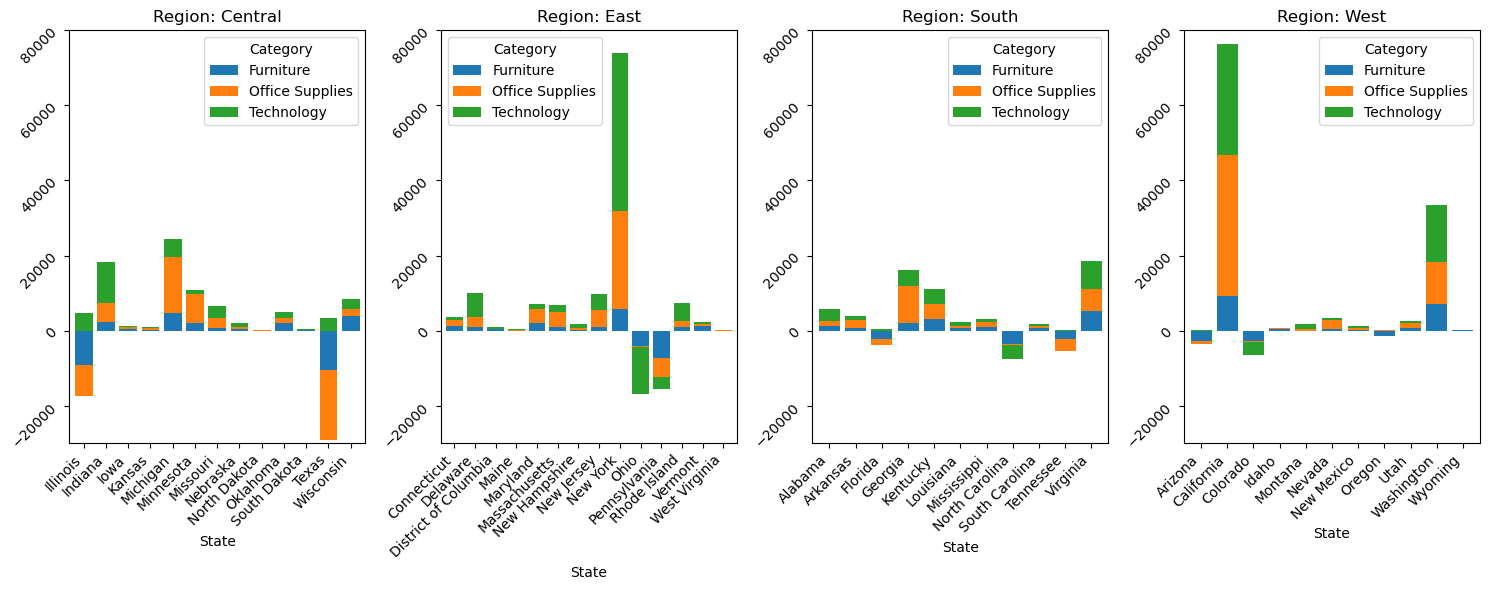

In [38]:
# Profit by state, by region and product category

grouped_data = df.groupby(['Region', 'State', 'Category'], as_index=False)['Profit'].sum()

pivot_data = grouped_data.pivot_table(index=['Region', 'State'], columns='Category', values='Profit', aggfunc='sum', fill_value=0)

plt.figure(figsize=(15, 6))

regions = pivot_data.index.get_level_values('Region').unique()
for i, region in enumerate(regions, start=1):
    plt.subplot(1, 4, i)

    region_data = pivot_data.xs(region, level='Region')

    region_data.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    
    plt.title(f'Region: {region}')
    plt.xlabel('State')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.ylim(top=80000, bottom=-30000)

plt.tight_layout()
plt.show()

**INSIGHTS**:
- In central region, Texas and Illinois have negative profit. Only tech delivers positive profit. By contrary, Michigan has positive profit and there also Office Suppliers and Furniture provide positive profit.

- In the east, New York is clearly the best performer, especially selling Tech and Office Suppliers. On the other side, Ohio and Pennsylvania have negative profit in all product categories.

- In south of US, the highest profit comes from Georgia and Virginia, while Florida, North Carolina and Tennessee have negative profit in all product categories.

- In the West, California and Washington contribute the most to the overall profit. Although, Arizona and Colorado have negative profit in all product categories.

In [39]:
# Hypotesys test:

# Hº = the mean of list price for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 1.4799007015120578
P-value: 0.01935899218906737
Reject the null hypothesis: The mean 'List Price' is significantly different by State.


In [40]:
# Hypotesys test:

# Hº = the mean of discount for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 83.66956000020525
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


In [41]:
# Hypotesys test:

# Hº = the mean of list price for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 1.059875485039983
P-value: 0.362728000427097
Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.


In [42]:
# Hypotesys test:

# Hº = the mean of discount for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 128.18782151131293
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


In [43]:
# Hypotesys test:

# Hº = the mean of list price for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 0.55664242934307
P-value: 0.9926429121431197
Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.


In [44]:
# Hypotesys test:

# Hº = the mean of discount for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 78.65221482717071
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


**INSIGHTS:**
- Furniture: both, list price and discount, are significantly different by state
- Office Supplies & Technology: the list price is similar by state, but discount policy is significantly different

### Clustering

In [45]:
def levels(x):
    if x < 0:
        return 'Low'
    elif 0 <= x <= 28.66:
        return 'Medium'
    else:
        return 'High'

In [46]:
df['Profit Level'] = df['Profit'].apply(lambda row: levels(row))
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK,Order Year,Order Month,Profit Level
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98,110.02,0.16,386,FUR-BO-10001798-00386,2016,11,High
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98,170.79,0.30,839,FUR-CH-10000454-00839,2016,11,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31,3.87,0.47,1433,OFF-LA-10000240-01433,2016,6,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23,366,FUR-TA-10000577-00366,2015,10,Low
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18,9.93,0.29,573,OFF-ST-10000760-00573,2015,10,Medium


In [47]:
df_high = df[df['Profit Level'] == 'High']
df_medium = df[df['Profit Level'] == 'Medium']
df_low = df[df['Profit Level'] == 'Low']

print(f'Order items with high profit: {len(df_high)}')
print(f'Order items with medium profit: {len(df_medium)}')
print(f'Order items with low profit: {len(df_low)}')

#df_high = df_high.drop('Profit Level', axis=1)

#df_high

Order items with high profit: 2550
Order items with medium profit: 5573
Order items with low profit: 1871


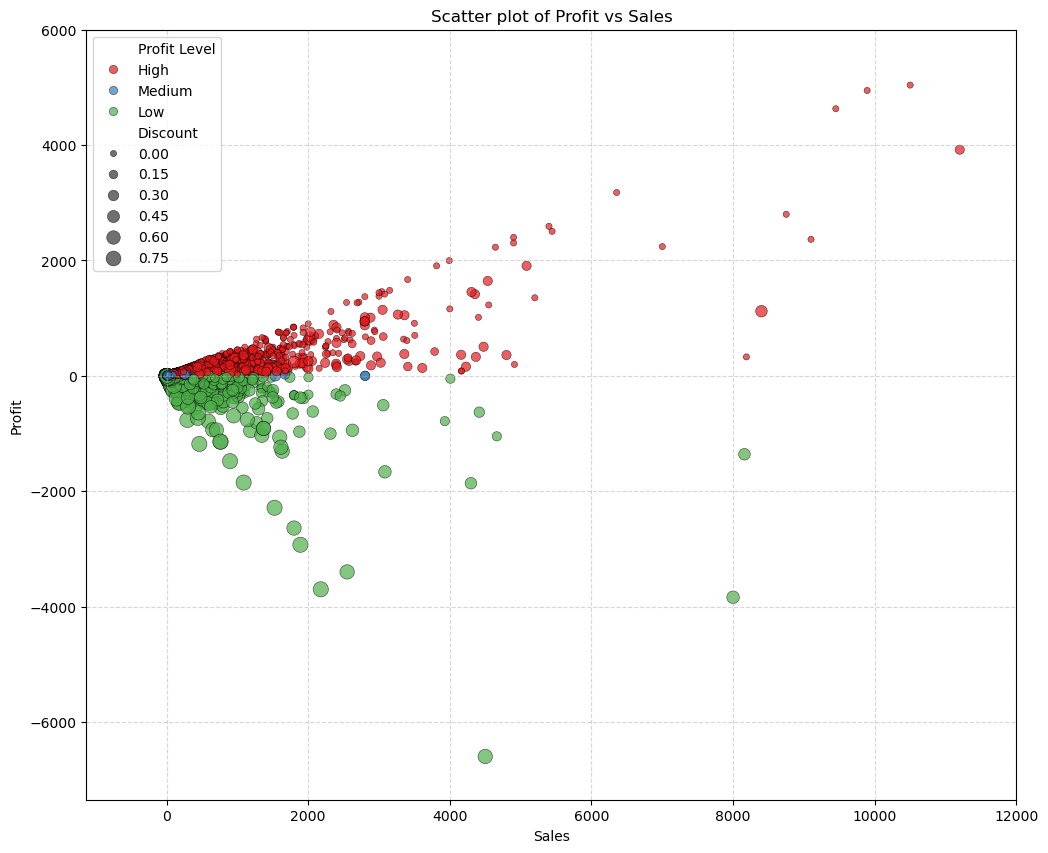

In [48]:
# Scatter plot - Profit vs Sales by Profit Level:

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, y='Profit', x='Sales', hue='Profit Level', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.ylim(ymax=6000)
plt.xlim(xmax=12000)

plt.grid(True, linestyle='--', alpha=0.5) 

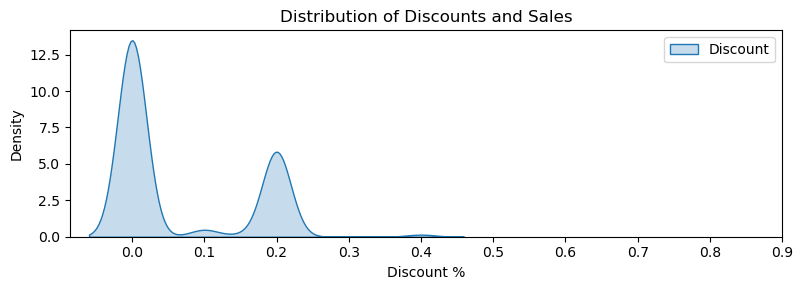

In [49]:
# Plot KDE for Discount - High Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_high, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

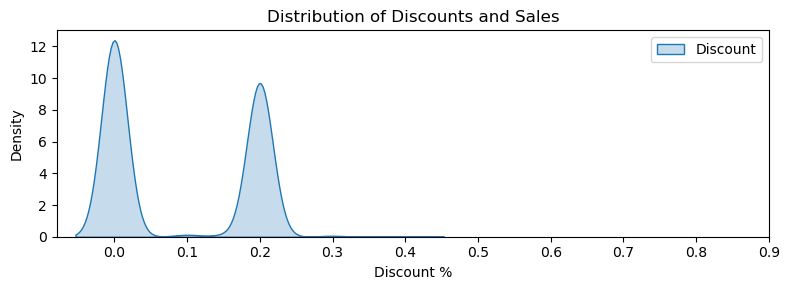

In [50]:
# Plot KDE for Discount - Medium Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_medium, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

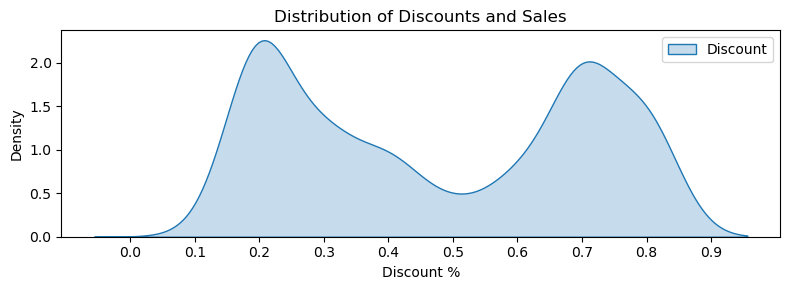

In [51]:
# Plot KDE for Discount - Low Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_low, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

**INSIGHTS**:
- For High and Medium Profit, the most frequent discount is 0% or 20%
- For Low or negative Profit, tere are two peacks in Discount Distribution: 10-50% and 50-90%

In [52]:
# Distribution by state

# 1. Calculate the total profit by State
df_by_state = df.groupby(['State', 'City']).agg(
    Total_Profit=('Profit', 'sum'),
    Total_Orders=('Order ID', 'count'))

# 2. Calculate the probabilities of Profit Level by State
probabilities = df.groupby(['State', 'City'])['Profit Level'].value_counts(normalize=True).unstack(fill_value=0)
new_order = ['High', 'Medium', 'Low']
probabilities = probabilities[new_order]

# 3. Combine the total profit and probabilities into one DataFrame
result = pd.concat([df_by_state, probabilities], axis=1).sort_values(by=['State', 'Total_Orders'], ascending=[True, False])

result

Total_Profit  Total_Orders      High    Medium  Low
State     City                                                           
Alabama   Decatur        1000.0881            13  0.384615  0.615385  0.0
          Mobile         2175.8292            11  0.636364  0.363636  0.0
          Huntsville     1005.2572            10  0.400000  0.600000  0.0
          Montgomery      834.6571            10  0.500000  0.500000  0.0
          Auburn          452.6071             6  0.500000  0.500000  0.0
...                            ...           ...       ...       ...  ...
Wisconsin Wausau           90.4306             4  0.250000  0.750000  0.0
          Appleton        554.7663             2  0.500000  0.500000  0.0
          West Allis       28.3708             2  0.000000  1.000000  0.0
          Waukesha         14.1700             1  0.000000  1.000000  0.0
Wyoming   Cheyenne        100.1960             1  1.000000  0.000000  0.0

[603 rows x 5 columns]

In [53]:
result_ncarolina = result.loc['North Carolina']

result_ncarolina

,Total_Profit,Total_Orders,High,Medium,Low
City,,,,,
Charlotte,-429.7824,52,0.250000,0.461538,0.288462
Jacksonville,121.8258,50,0.140000,0.580000,0.280000
Fayetteville,126.7273,27,0.148148,0.592593,0.259259
Raleigh,472.5940,22,0.227273,0.636364,0.136364
Greensboro,-122.9534,13,0.076923,0.384615,0.538462
Burlington,-5894.5269,11,0.090909,0.545455,0.363636
Durham,116.8699,9,0.111111,0.777778,0.111111
Greenville,-548.9884,9,0.111111,0.444444,0.444444
Monroe,140.8264,9,0.111111,0.777778,0.111111


Conclusion: within the same State, Cities have different patterns in terms of profit.

### Machine learning

In [54]:
import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

C:\Users\Kristina\miniconda3\envs\fp_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dimension reduction: UMAP

In [55]:
df_umap = df_low[[x for x in df_low.columns if x != 'Profit']]
target = np.array(df_low['Profit'])

In [56]:
# Label Encoding for categorical features

cat_vars = cat_vars + ['Profit Level']

label_encoder = LabelEncoder()

for col in cat_vars:
    df_umap.loc[:, col] = label_encoder.fit_transform(df_umap[col])
    
df_umap.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK,Order Year,Order Month,Profit Level
3,4,1049,280,306,3,568,553,0,0,77,5,33311,2,217,0,11,135,957.5775,5,0.45,7,348.21,191.52,268.12,0.23,366,221,2015,10,0
14,15,1055,304,334,3,262,253,2,0,78,20,76106,0,295,1,1,400,68.8100,5,0.80,4,68.81,13.76,38.53,0.44,822,299,2015,11,0
15,16,1055,304,334,3,262,253,2,0,78,20,76106,0,350,1,2,687,2.5440,3,0.80,4,4.24,0.85,2.12,0.50,1512,354,2015,11,0
23,24,1296,637,691,2,549,537,0,0,167,17,19140,1,74,0,4,355,71.3720,2,0.30,2,50.98,35.69,36.20,0.29,746,76,2017,7,0
27,28,1086,264,288,3,592,614,0,0,167,17,19140,1,42,0,3,614,3083.4300,7,0.50,4,880.98,440.49,678.35,0.23,1351,43,2015,9,0


In [57]:
# Scaling

scaler = StandardScaler()

df_scaled_umap = scaler.fit_transform(df_umap)

#df_scaled_umap

In [58]:
# Train the reducer

reducer = umap.UMAP(random_state=42, 
                    n_neighbors=5, 
                    min_dist=0,
                    n_components=2,
                    metric='euclidean')
reducer.fit(df_scaled_umap)

C:\Users\Kristina\miniconda3\envs\fp_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kristina\miniconda3\envs\fp_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(min_dist=0, n_jobs=1, n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [59]:
# Transform dataset into 2D shape

embedding = reducer.transform(df_scaled_umap)

embedding_df = pd.DataFrame(embedding)
embedding_df

C:\Users\Kristina\miniconda3\envs\fp_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1
0,0.831709,1.040154
1,-2.225270,10.038743
2,-2.223750,10.125118
3,-1.040927,0.619750
4,0.345175,1.529616
...,...,...
1866,-2.064343,10.768718
1867,-1.428823,8.740512
1868,2.419477,-3.228018
1869,2.311108,-2.511008


#### Clustering: DBSCAN

In [60]:
dbscan_c = DBSCAN(eps=0.5,
                  min_samples=25).fit(embedding)

dbscan_c

DBSCAN(min_samples=25)

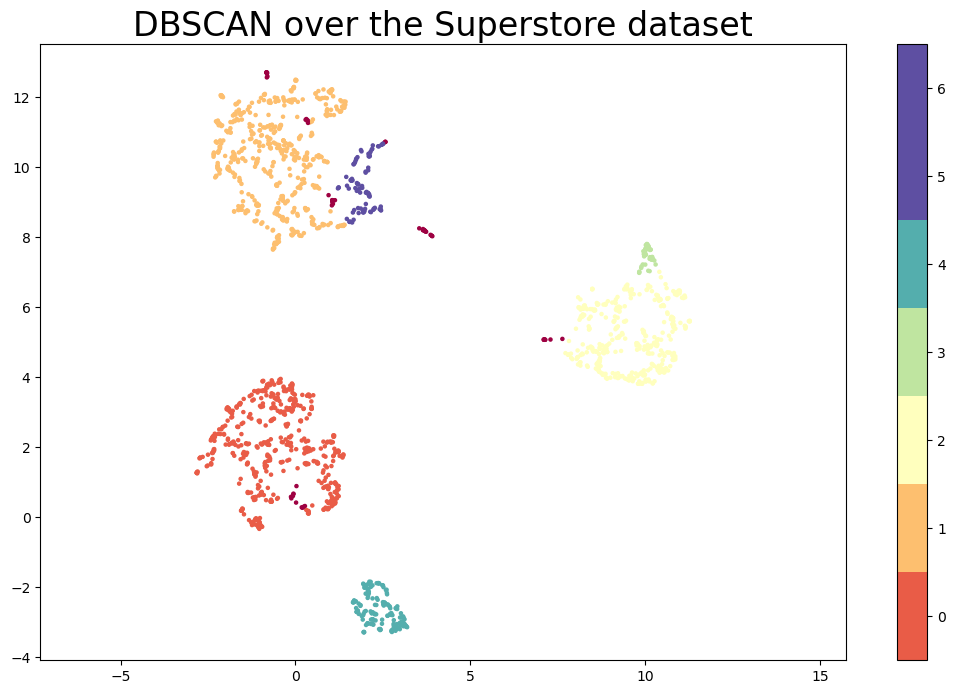

In [61]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5)\
.set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('DBSCAN over the Superstore dataset', fontsize=24);

In [62]:
check_emb_dbscan = pd.DataFrame({'Profit':target, 'Infered Labels':dbscan_c.labels_})
unique_clusters = np.unique(dbscan_c.labels_)
print(unique_clusters)
print(f'Total clusters infered: {len(unique_clusters)}')
check_emb_dbscan

[-1  0  1  2  3  4  5]
Total clusters infered: 7


,Profit,Infered Labels
0,-383.0310,0
1,-123.8580,1
2,-3.8160,1
3,-1.0196,0
4,-1665.0522,0
...,...,...
1866,-35.8176,1
1867,-4.5936,1
1868,-40.1960,4
1869,-1.7772,4


In [63]:
df_low_cat = pd.merge(df_low, check_emb_dbscan)

df_low_cat.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK,Order Year,Order Month,Profit Level,Infered Labels
0,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23,366,FUR-TA-10000577-00366,2015,10,Low,0
1,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,4,68.81,13.76,38.53,0.44,822,OFF-AP-10002311-00822,2015,11,Low,1
2,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,4,4.24,0.85,2.12,0.50,1512,OFF-BI-10000756-01512,2015,11,Low,1
3,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,2,50.98,35.69,36.20,0.29,746,FUR-CH-10002774-00746,2017,7,Low,0
4,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,4,880.98,440.49,678.35,0.23,1351,FUR-BO-10004834-01351,2015,9,Low,0


In [64]:
df_levels = df_low_cat.groupby('Infered Labels').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_levels['profit_sum'] = df_levels['profit_sum']/1000
df_levels['sales_sum'] = df_levels['sales_sum']/1000
df_levels['quantity_sum'] = df_levels['quantity_sum']/1000
df_levels['gross_margin'] = df_levels['profit_sum'] / df_levels['sales_sum']
    
df_levels = df_levels.sort_values(by='profit_sum', ascending = False)

df_levels.sort_values(by='Infered Labels')

,Infered Labels,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,-1,-47.943634,-599.295425,0.625000,86.586811,0.299,-0.553706
1,0,-52.286887,-76.331221,0.387066,243.092836,2.499,-0.215090
2,1,-25.150719,-37.707224,0.744528,19.313455,2.537,-1.302238
3,2,-28.816091,-52.108664,0.264231,134.816378,1.882,-0.213743
4,3,-0.642911,-8.459358,0.207895,8.973230,0.228,-0.071648
5,4,-13.940570,-66.383665,0.260952,66.780042,0.725,-0.208754
6,5,-4.400758,-34.926648,0.715873,4.791519,0.539,-0.918447


In [65]:
# Lets have a close look at the biggest categories: 0, 1 and 2

df_low_cat0 = df_low_cat[df_low_cat['Infered Labels'] == 0]
df_low_cat1 = df_low_cat[df_low_cat['Infered Labels'] == 1]
df_low_cat2 = df_low_cat[df_low_cat['Infered Labels'] == 2]

#df_low_cat0.head()

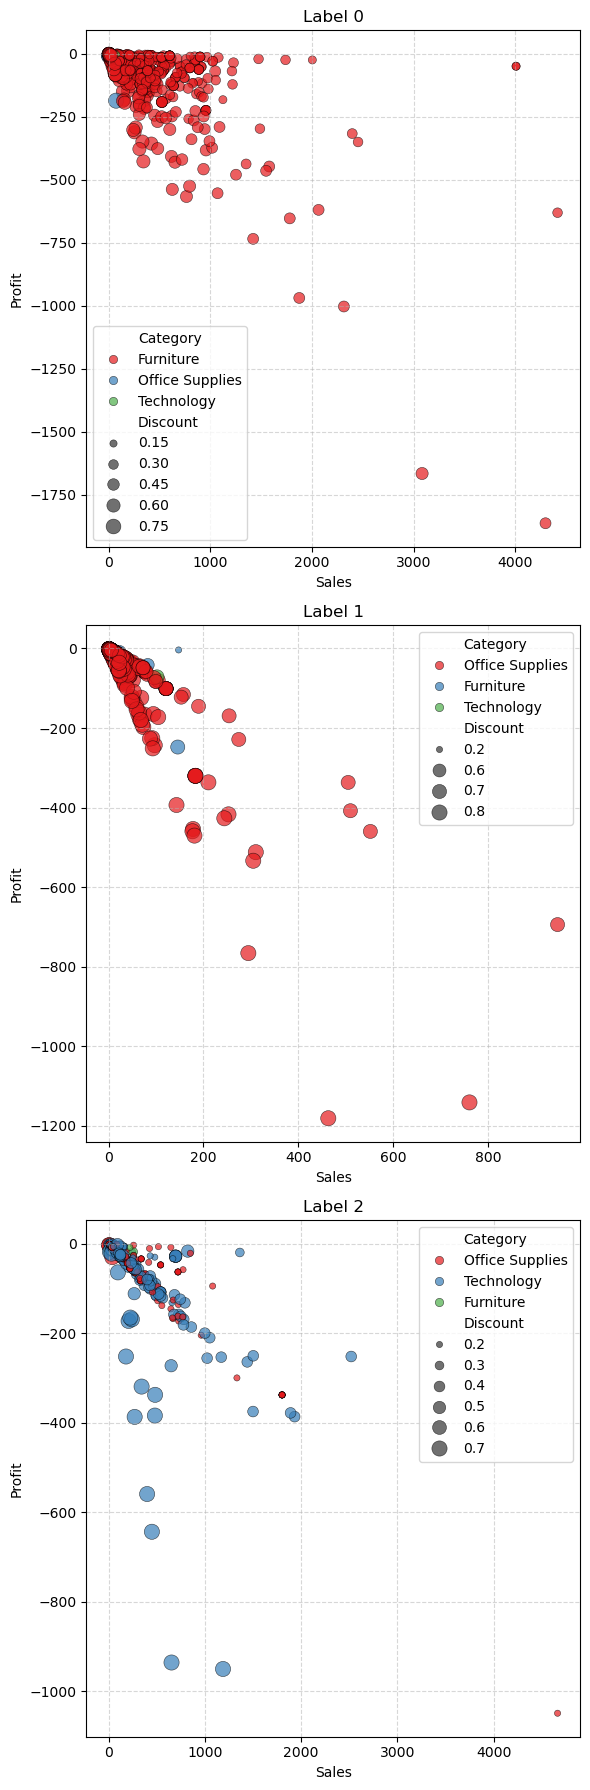

In [66]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_cat0, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label 0')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat1, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 1')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat2, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 2')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()

**INSIGHTS**:
- Label 0: avg. discount > 30%, mainly Furniture
- Label 1: avg. discount > 70%, mainly Office Supplies
- Label 2: avg. discount 20-60%, mainly Office Supplies (low discount) and Technology (high discount)

In [67]:
# 10 States with negative profit:

#states_neg_profit = ['Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina', 'Colorado', 'Tennessee', 'Arizona', 'Florida', 'Oregon']

In [68]:
probabilities = df_low_cat.groupby(['Category', 'Sub-Category'])['Infered Labels'].value_counts(normalize=True).unstack(fill_value=0)

probabilities

Infered Labels                      -1         0         1         2  \
Category        Sub-Category                                           
Furniture       Bookcases     0.015152  0.681818  0.007576  0.007576   
                Chairs        0.012048  0.680723  0.000000  0.018072   
                Furnishings   0.009662  0.913043  0.024155  0.009662   
                Tables        0.021008  0.710084  0.000000  0.000000   
Office Supplies Appliances    0.000000  0.028571  0.971429  0.000000   
                Binders       0.072539  0.002591  0.761658  0.003886   
                Fasteners     0.000000  0.000000  0.000000  1.000000   
                Storage       0.000000  0.008197  0.008197  0.967213   
                Supplies      0.048780  0.000000  0.000000  0.951220   
Technology      Accessories   0.000000  0.015038  0.000000  0.428571   
                Machines      0.195652  0.000000  0.065217  0.695652   
                Phones        0.000000  0.017857  0.000000  0.970238   

Infered Labels                       3         4         5  
Category        Sub-Category                                
Furniture       Bookcases     0.000000  0.287879  0.000000  
                Chairs        0.000000  0.289157  0.000000  
                Furnishings   0.004831  0.038647  0.000000  
                Tables        0.000000  0.268908  0.000000  
Office Supplies Appliances    0.000000  0.000000  0.000000  
                Binders       0.000000  0.000000  0.159326  
                Fasteners     0.000000  0.000000  0.000000  
                Storage       0.000000  0.016393  0.000000  
                Supplies      0.000000  0.000000  0.000000  
Technology      Accessories   0.548872  0.000000  0.007519  
                Machines      0.000000  0.000000  0.043478  
                Phones        0.011905  0.000000  0.000000

**INSIGTS**: After checking the clusters by region and product, we can conclude that the clustering is highly dependant on Product and Discount.

- Label 0: avg. discount > 30%, mainly Furniture -- Bookcases, Chairs, Furnishings, Tables
- Label 1: avg. discount > 70%, mainly Office Supplies -- Applicances, Binders
- Label 2: avg. discount 20-60%, Label 2: avg. discount 20-60%, mainly Office Supplies (low discount) -- Fasteners, Storage, Supplies and Technology (high discount) -- Machines, Phones